In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import uproot
from yahist import Hist1D
from matplotlib.ticker import AutoMinorLocator
from os import listdir
from os.path import isfile, join

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
mypath = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/TTJets/TTJets_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_RunIISummer16NanoAODv7-PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8-v1_NANOAODSIM_baby_v3-0-0/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
def files(i):
    return uproot.open(mypath+onlyfiles[i]).get("tree").pandas.df()
mypathdata = lambda i : f"/hadoop/cms/store/user/jguiang/ttbarCR/babies/MuonEG/MuonEG_Run2016{i}-02Apr2020-v1_NANOAOD_baby_v3-0-0/"
alp = ['C','D','E','F','G','H']
onlyfilesdata = lambda j : [f for f in listdir(mypathdata(alp[j])) if isfile(join(mypathdata(alp[j]), f))]
def filesdata(i,j):
    return uproot.open(mypathdata(alp[i])+onlyfilesdata(i)[j]).get("tree").pandas.df()

# B Events
mypathB = lambda m : f"/hadoop/cms/store/user/jguiang/ttbarCR/babies/MuonEG/MuonEG_Run2016B-02Apr2020_ver{m}-v1_NANOAOD_baby_v3-0-0/"
onlyfilesB = lambda n : [f for f in listdir(mypathB(n)) if isfile(join(mypathB(n), f))]
def filesB(i,j):
    return uproot.open(mypathB(i)+onlyfilesB(i)[j]).get("tree").pandas.df()

In [4]:
mc = pandas.concat([files(i) for i in range(len(onlyfiles))])
data = pandas.concat([filesdata(j,i) for j in range(len(alp)) for i in range(len(onlyfilesdata(j)))])
dataB = pandas.concat([filesB(i,j) for i in [1,2] for j in range(len(onlyfilesB(i)))])
dataB = dataB.drop_duplicates().reset_index(drop=True)
data = pandas.concat([data,dataB])
mc_c = mc[mc['num_btags_tight'] == 2]
data_c = data[data['num_btags_tight'] == 2]

In [6]:
xsec_weight = 831.76 * 35920 / 10199051

In [7]:
comb_w = mc_c.mc_weight * mc_c.mc_tight_btag_weight * xsec_weight

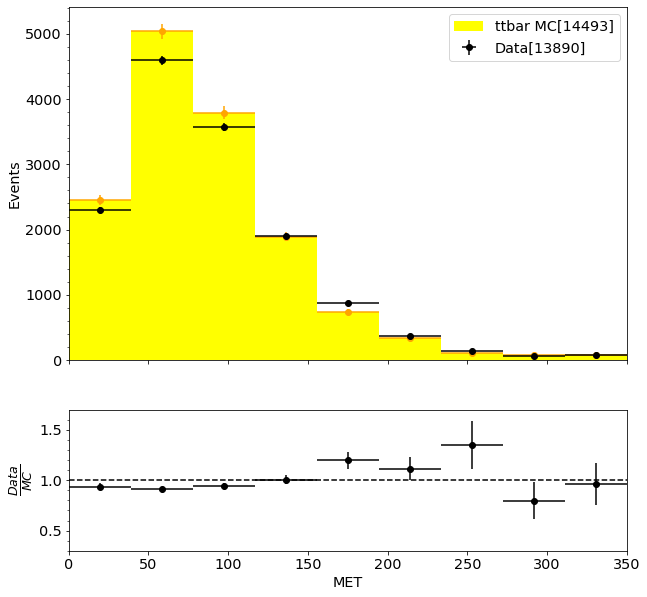

In [10]:
bins = np.linspace(0,350,10)
mc_p = Hist1D(mc_c.met,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.met,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.met,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,350)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"MET")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

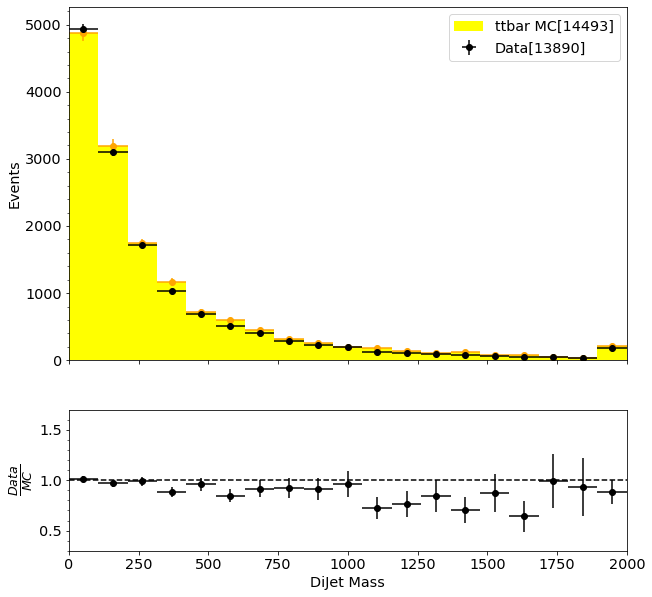

In [20]:
bins = np.linspace(0,2000,20)
mc_p = Hist1D(mc_c.dijet_mass,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.dijet_mass,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.dijet_mass,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,2000)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"DiJet Mass")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

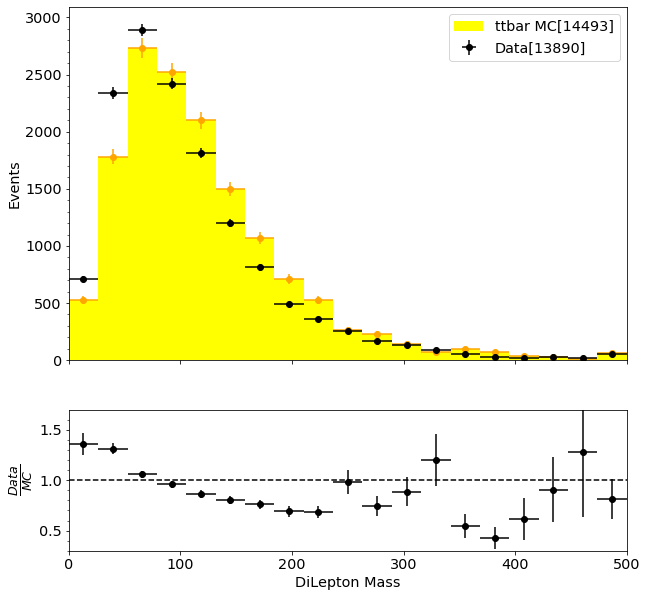

In [23]:
bins = np.linspace(0,500,20)
mc_p = Hist1D(mc_c.dilep_mass,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.dilep_mass,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.dilep_mass,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,500)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"DiLepton Mass")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

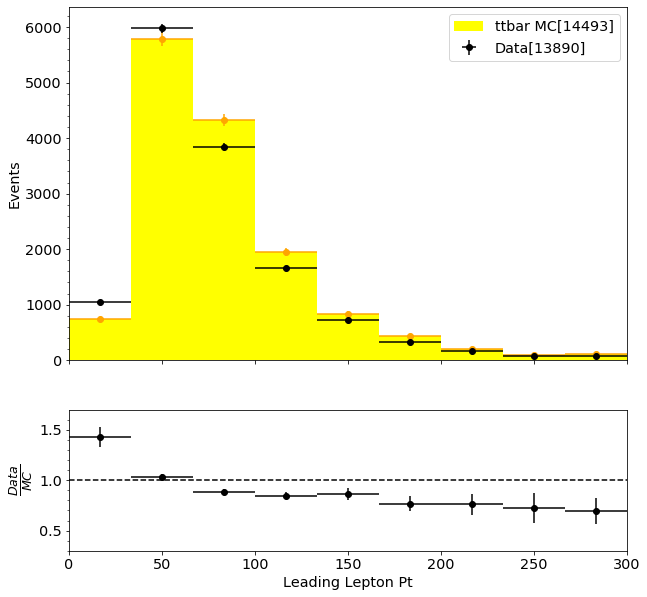

In [24]:
bins = np.linspace(0,300,10)
mc_p = Hist1D(mc_c.leading_lep_pt,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.leading_lep_pt,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.leading_lep_pt,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,300)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Leading Lepton Pt")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

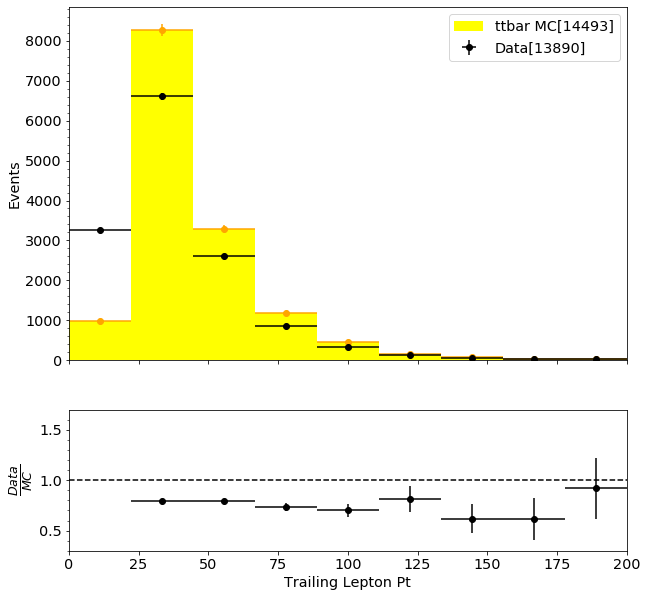

In [31]:
bins = np.linspace(0,200,10)
mc_p = Hist1D(mc_c.trailing_lep_pt,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.trailing_lep_pt,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.trailing_lep_pt,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,200)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton Pt")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

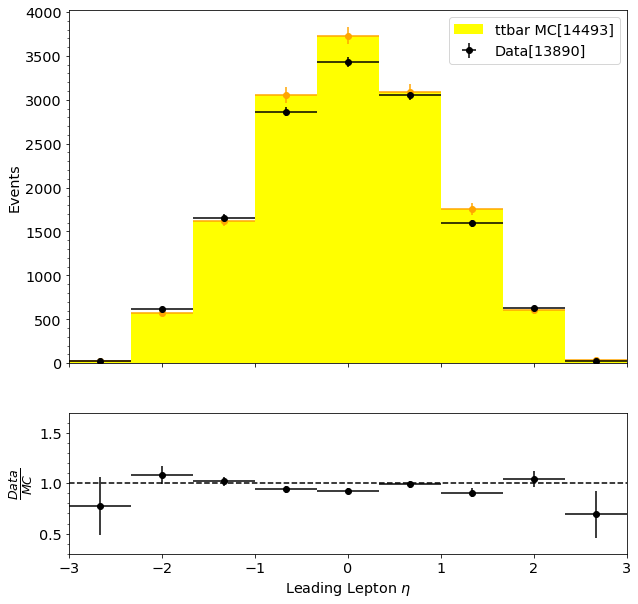

In [32]:
bins = np.linspace(-3,3,10)
mc_p = Hist1D(mc_c.leading_lep_eta,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.leading_lep_eta,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.leading_lep_eta,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-3,3)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Leading Lepton $\eta$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

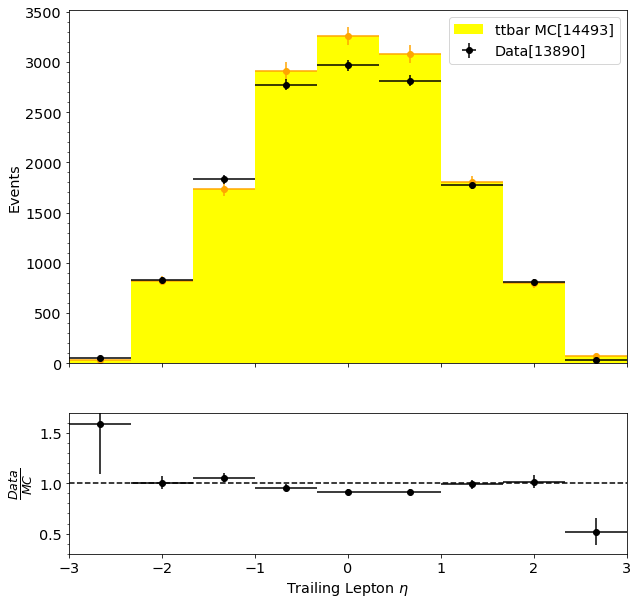

In [34]:
bins = np.linspace(-3,3,10)
mc_p = Hist1D(mc_c.trailing_lep_eta,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.trailing_lep_eta,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.trailing_lep_eta,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-3,3)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton $\eta$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

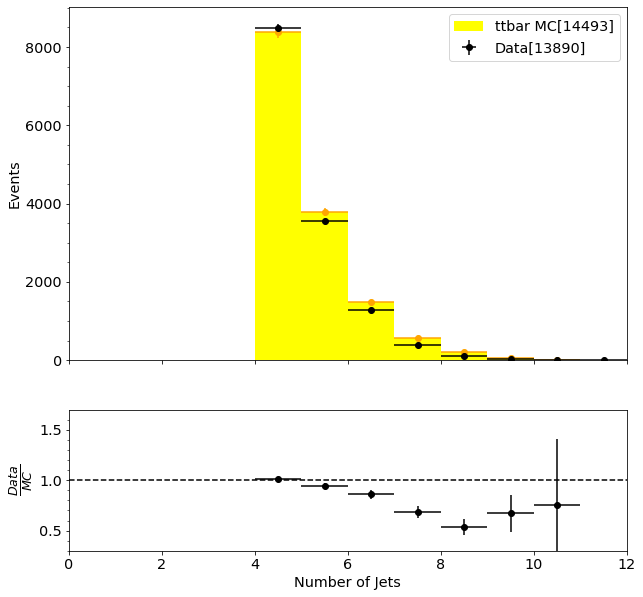

In [36]:
bins = np.linspace(0,12,13)
mc_p = Hist1D(mc_c.num_jets,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.num_jets,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.num_jets,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,12)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Number of Jets")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

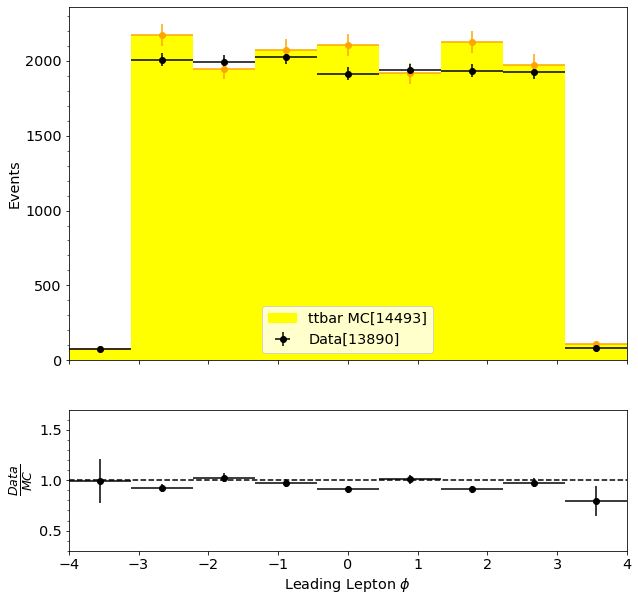

In [37]:
bins = np.linspace(-4,4,10)
mc_p = Hist1D(mc_c.leading_lep_phi,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.leading_lep_phi,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.leading_lep_phi,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-4,4)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Leading Lepton $\phi$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

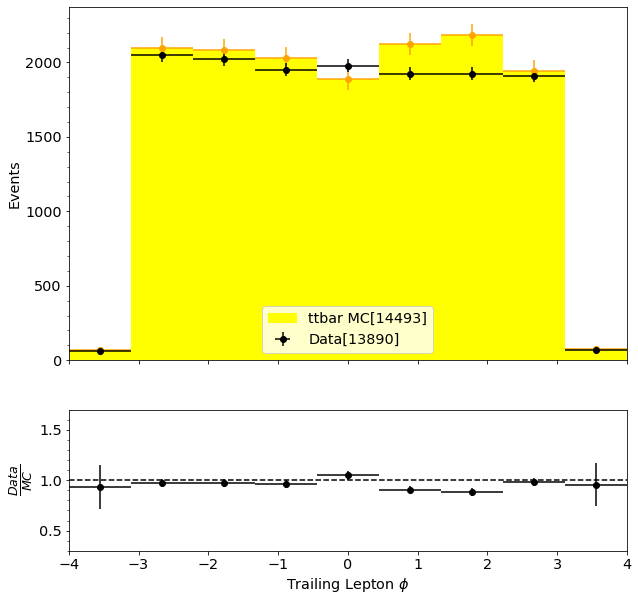

In [39]:
bins = np.linspace(-4,4,10)
mc_p = Hist1D(mc_c.trailing_lep_phi,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.trailing_lep_phi,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.trailing_lep_phi,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-4,4)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton $\phi$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')